# Compare more than 2 models

## Import dependencies and classifiers

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import random
from ftest import ftest
import scipy.stats

#Classifiers
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Dataset
from mlxtend.data import iris_data

## Load data

Imported small dataset and divided data in train and validation randomly

In [58]:
#Load Data
X, y = iris_data()
X = X[:,[0, 2]]     #Easy to visualize

#Divide data into Train and Validation
c = list(zip(X, y))
random.shuffle(c)
X, y = zip(*c)
X, y = np.array(list(X)), np.array(list(y))

X_val = X[:50]
X = X[50:]

y_val = y[:50]
y = y[50:]

## Initialize Classifiers

In [55]:
# Initializing Classifiers
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='rbf')
clf3 = LinearDiscriminantAnalysis()
clf4 = KNeighborsClassifier(n_neighbors=3)
clf5 = Perceptron()

labels = ['SVM linear',
          'SVM RBF',
          'LinearDiscriminantAnalysis',
          'KNN',
          'Perceptron']

## Plot data

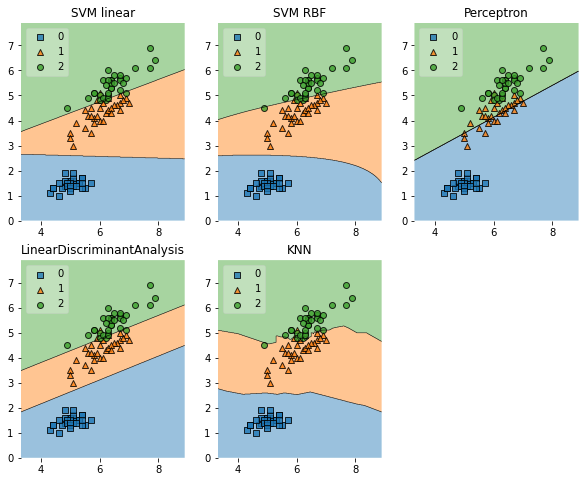

In [59]:

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(10, 8))
preds = []
                       
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5],
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (0,2)]):
                       
    clf.fit(X, y) #FIT model
    preds.append(np.array(clf.predict(X_val))) #MakePredictions

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()



Normally peceptron will do bad (not allways due to random)

## F-Test

In [ ]:
def f_test(y_true, *y_models):
    n = len(y_true)
    m = len(y_models)

    avgACC = sum([accuracy_score(y_true, y) for y in y_models]) / m

    gjSum = sum([((y_true == ypred).sum() / n)**2 for ypred in y_models])
    ssa = n * gjSum - n * m * avgACC**2

    mjSum = 0
    for i in range(n):
        y = y_true[i]
        count = 0
        for ypred in y_models:
            if y == ypred[i]:
                count += 1
        mjSum += count**2
    ssb = 1/m * mjSum - m * n * avgACC**2

    sst = m * n * avgACC*(1-avgACC)

    ssab = sst - ssa - ssb

    msa = ssa / (m-1)

    msab = ssab / ((m-1) * (n-1))

    f = msa / msab

    degrees_of_freedom_1 = m - 1
    degrees_of_freedom_2 = degrees_of_freedom_1 * n

    p_value = scipy.stats.f.sf(f, degrees_of_freedom_1, degrees_of_freedom_2)

    return f, p_value

In [50]:
def nullHyp(p_value):
    if p_value < 0.05:   #significance level α=0.05
        print("reject the null hypothesis") #there is a difference between the classification accuracies
    else:
        print("accept the null hypothesis") #There is no difference between the classification accuracies

## Compare models

In [51]:
#TRY WITHOUT PECEPTRON

f, p_value = f_test(y_val, preds[0],preds[1],preds[2],preds[3])
print('F: %.3f' % f)
print('p-value: %.3f' % p_value)
nullHyp(p_value)


F: 1.000
p-value: 0.395
accept the null hypothesis


In [52]:
#TRY WITH PECEPTRON

f, p_value = f_test(y_val, preds[0],preds[1],preds[2],preds[3], preds[4])
print('F: %.3f' % f)
print('p-value: %.3f' % p_value)
nullHyp(p_value)

F: 3.471
p-value: 0.009
reject the null hypothesis
